In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in the dataset 
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
# examining the dataset features
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
748,2/12/2015,Quarter2,sweing,Thursday,3,0.35,30.10,770.0,6960,0,0.0,0,1,58.0,0.350302
914,2/24/2015,Quarter4,finishing,Tuesday,9,0.70,2.90,NaN,1800,0,0.0,0,0,15.0,0.726933
778,2/15/2015,Quarter3,finishing,Sunday,8,0.70,4.15,NaN,960,0,0.0,0,0,8.0,0.605208
219,1/13/2015,Quarter2,finishing,Tuesday,3,0.80,4.15,NaN,1620,0,0.0,0,0,9.0,0.901263
1103,3/7/2015,Quarter1,finishing,Saturday,2,0.65,3.90,NaN,1920,0,0.0,0,0,8.0,0.528125
53,1/4/2015,Quarter1,finishing,Sunday,10,0.70,3.94,NaN,4320,0,0.0,0,0,18.0,0.759228
785,2/16/2015,Quarter3,sweing,Monday,1,0.80,22.52,1422.0,6840,113,0.0,0,0,57.0,1.000230
522,1/31/2015,Quarter5,finishing,Saturday,4,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.971867
327,1/19/2015,Quarter3,sweing,Monday,3,0.70,22.52,1095.0,10170,50,0.0,0,0,56.5,0.750063


In [4]:
# seeing each feature datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Data Description
##### 1. date : Date in MM-DD-YYYY
##### 2. day : Day of the Week
##### 3. quarter : A portion of the month. A month was divided into four quarters
##### 4. department : Associated department with the instance
##### 5. team_no : Associated team number with the instance
##### 6. no_of_workers : Number of workers in each team
##### 7. no_of_style_change : Number of changes in the style of a particular product
##### 8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
##### 9. smv : Standard Minute Value, it is the allocated time for a task
##### 10. wip : Work in progress. Includes the number of unfinished items for products
##### 11. over_time : Represents the amount of overtime by each team in minutes
##### 12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
##### 13. idle_time : The amount of time when the production was interrupted due to several reasons
##### 14. idle_men : The number of workers who were idle due to production interruption
##### 15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [5]:
# size of the dataframe 
df.shape

(1197, 15)

In [6]:
# corrolation of features in the dataset
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [7]:
# basis stats for the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [8]:
# checking for sum of missing values for each feature
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
# calculate the percentage of data missing
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [10]:
percent_nan = percent_missing(df)

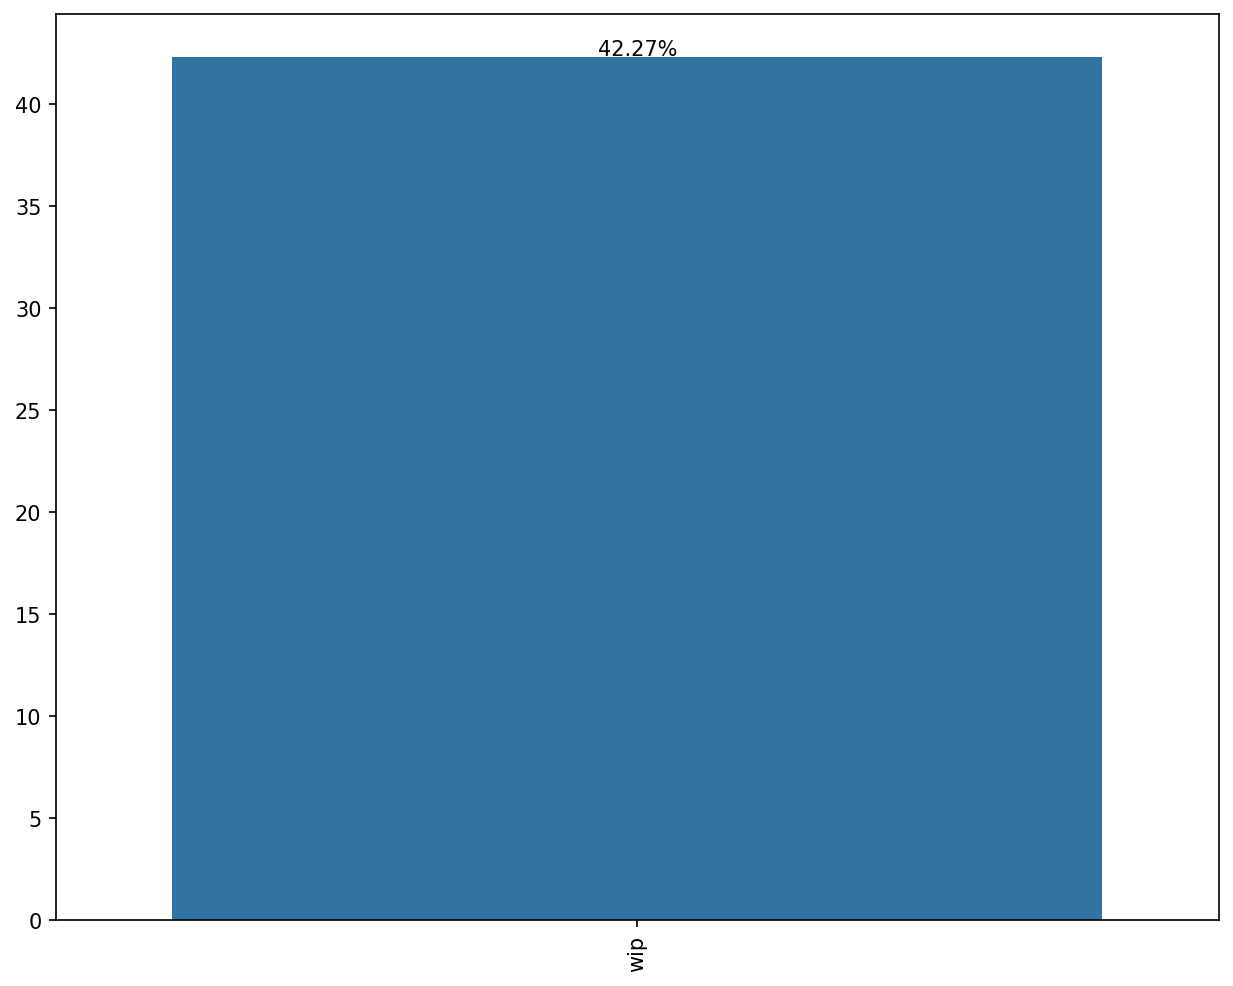

In [11]:
# visualizing missing data of all features as a percentage of the total df
plt.figure(figsize=(10,8),dpi=150)
ax = sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
    s="{}%".format(round(height,2)),
    ha='center')
plt.show()

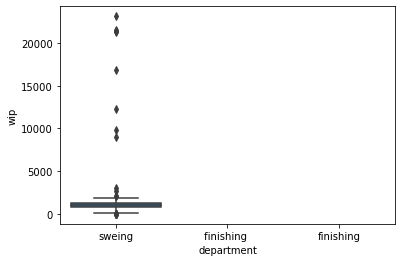

In [12]:
# displaying which department has the most missing mip 
sns.boxplot(x='department',y='wip',data=df)
plt.show()

#### since all of the missing wip data is in the finishing department. We can see that the finishing department is waiting on work from the sewing department and assign 0 for missing wip data in the finishing department

In [13]:
df['wip'] = df['wip'].fillna(0)

In [14]:
# converting the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

In [15]:
# grabbing the month name
df['month'] = df['date'].dt.month_name()

In [16]:
# converts overtime to hours 
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60)

In [17]:
# counts total number of values in each quarter 
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [18]:
# counts the total number of values in each day
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [19]:
# counts the total number of values in each month
df['month'].value_counts()

January     542
February    443
March       212
Name: month, dtype: int64

In [20]:
# counts the total number of value for each department
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [21]:
# changes department column to only finsihing or sewing
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing' or 'finishing') else 'sewing') 

In [22]:
# no longer duplicating deaprtments
df['department'].value_counts()

sewing       948
finishing    249
Name: department, dtype: int64

# EDA

In [23]:
# creates a department df with total counts and rename columns 
department = df['department'].value_counts().reset_index()
department.rename(columns= {'index':'department','department':'total_count'},inplace=True)

In [24]:
department['total_count']

0    948
1    249
Name: total_count, dtype: int64

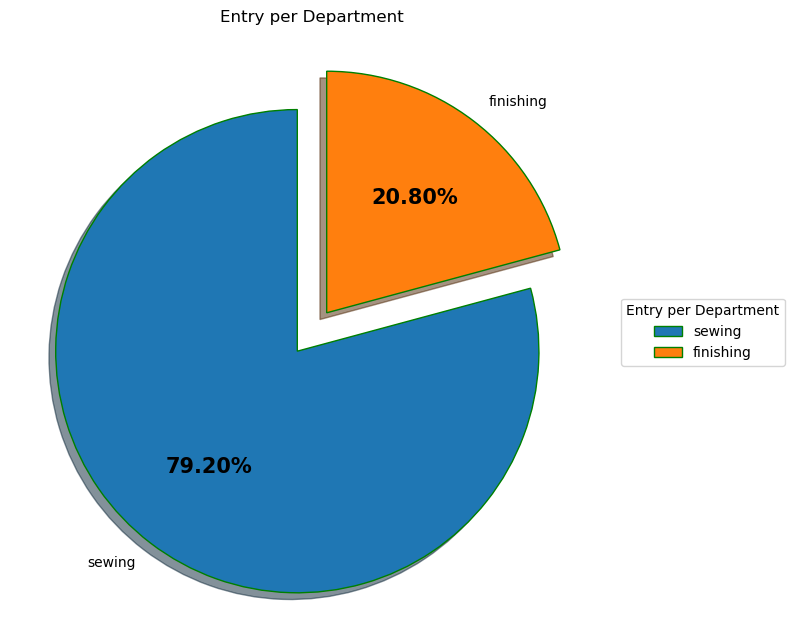

In [25]:
explode=[0.1,0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 8),dpi=100)
wedges, texts, autotexts = ax.pie(department['total_count'], 
                                  autopct = "%.2f%%",
                                  explode = explode, 
                                  labels = department['department'],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, department['department'],
          title ="Entry per Department",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Entry per Department")
  
# show plot
plt.savefig("Entry_per_Department.png")
plt.show()

In [26]:
# isolating the entries per quarter
quarters = df['quarter'].value_counts().reset_index()
quarters.rename(columns={'index':'quarter','quarter':'total_count'},inplace=True)

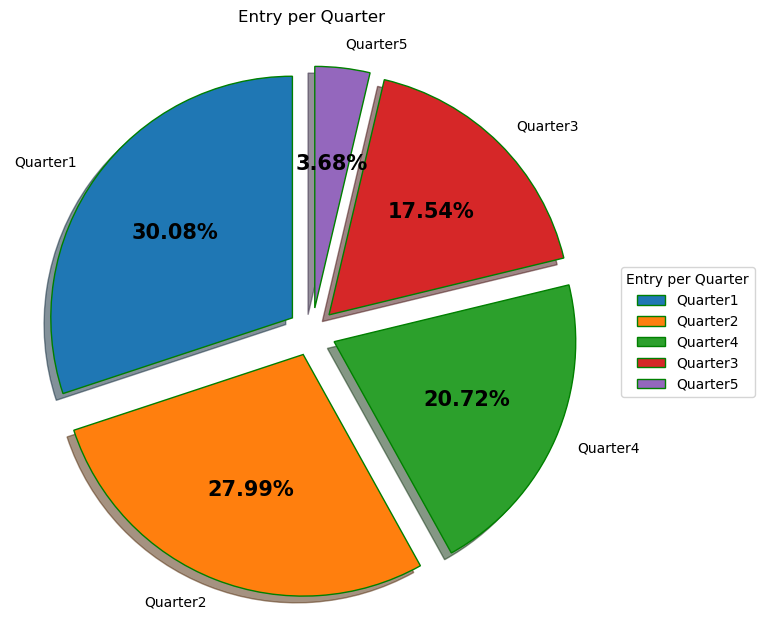

In [27]:
# plotting the number of entries per qaurter 
explode=[0.1,0.1,0.1,0.1,0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 8),dpi=100)
wedges, texts, autotexts = ax.pie(quarters['total_count'], 
                                  autopct = "%.2f%%",
                                  explode = explode, 
                                  labels = quarters['quarter'],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, quarters['quarter'],
          title ="Entry per Quarter",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Entry per Quarter")
  
# show plot
plt.savefig("Entry_per_Quarter.png")
plt.show()


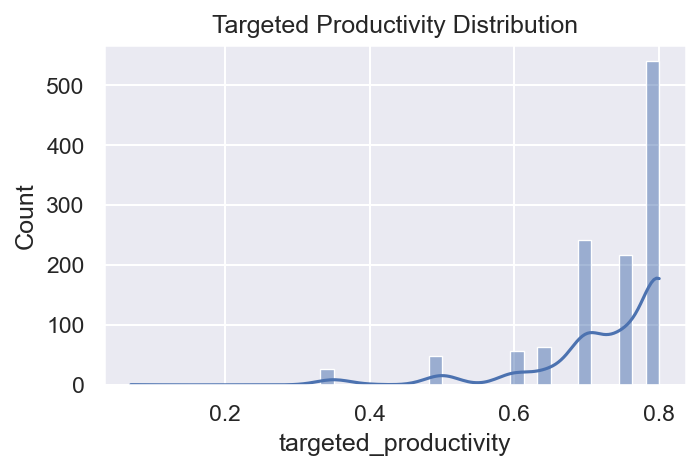

In [28]:
# plotting the distribution of targeted peoductivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['targeted_productivity'],kde=True)
plt.title('Targeted Productivity Distribution')
plt.savefig("Targeted_Productivity_Distribution.png")
plt.show()


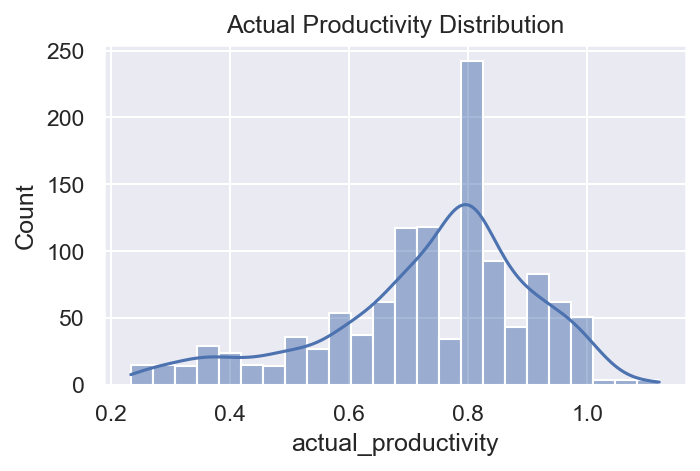

In [29]:
# plotting the distribution of actual productivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['actual_productivity'],kde=True)
plt.title('Actual Productivity Distribution')
plt.savefig("Actual_Productivity_Distribution.png")
plt.show()


In [30]:
#isolating the sum of incentives per month 
incentives = df[['month','incentive']].groupby('month',as_index=False,sort= False).agg({'incentive':'sum'})

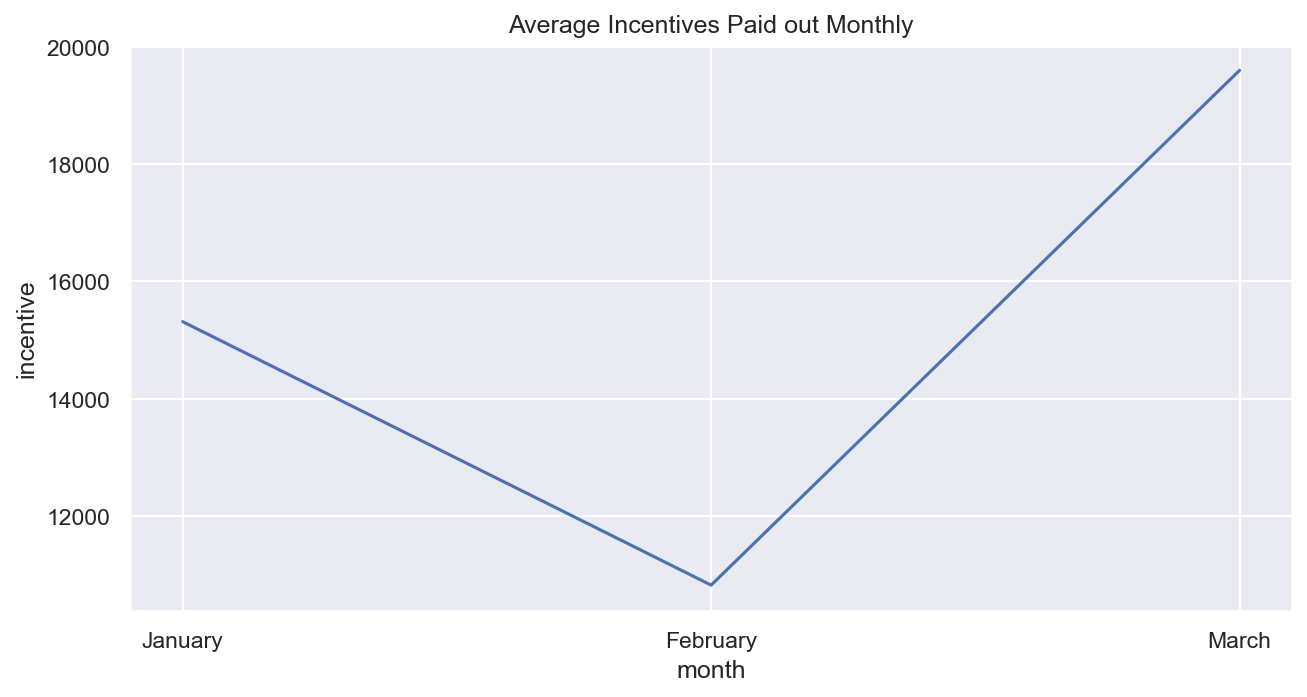

In [31]:
# plotting the average incentives per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=incentives,x='month',y='incentive',
                 palette='Paired',sort=True,markers=True,estimator='mean')
plt.title('Average Incentives Paid out Monthly')
plt.savefig("Average_Incentives_Paid_out_Monthly.png")
plt.show()


In [32]:
# average work in progress per team
work_in_progress_per_team = df[['month','wip','team']].groupby('team',as_index=False).mean()

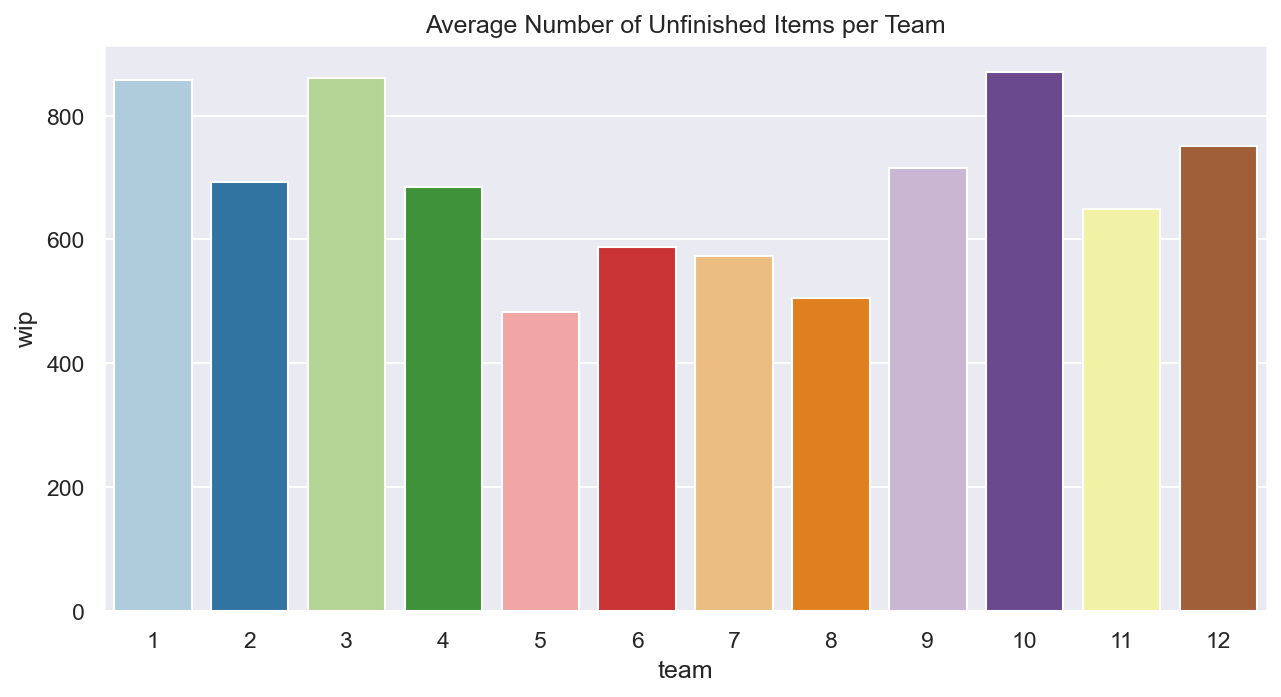

In [33]:
# plotting the average number of unfinished items per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=work_in_progress_per_team,x='team',y='wip',
                 palette='Paired')
plt.title('Average Number of Unfinished Items per Team')
plt.savefig("Average_Number_of_Unfinished_Items_per_Team.png")
plt.show()


In [34]:
# average working in progress per month
work_in_progress_per_month =  df[['month','wip']].groupby('month',sort=False).mean()

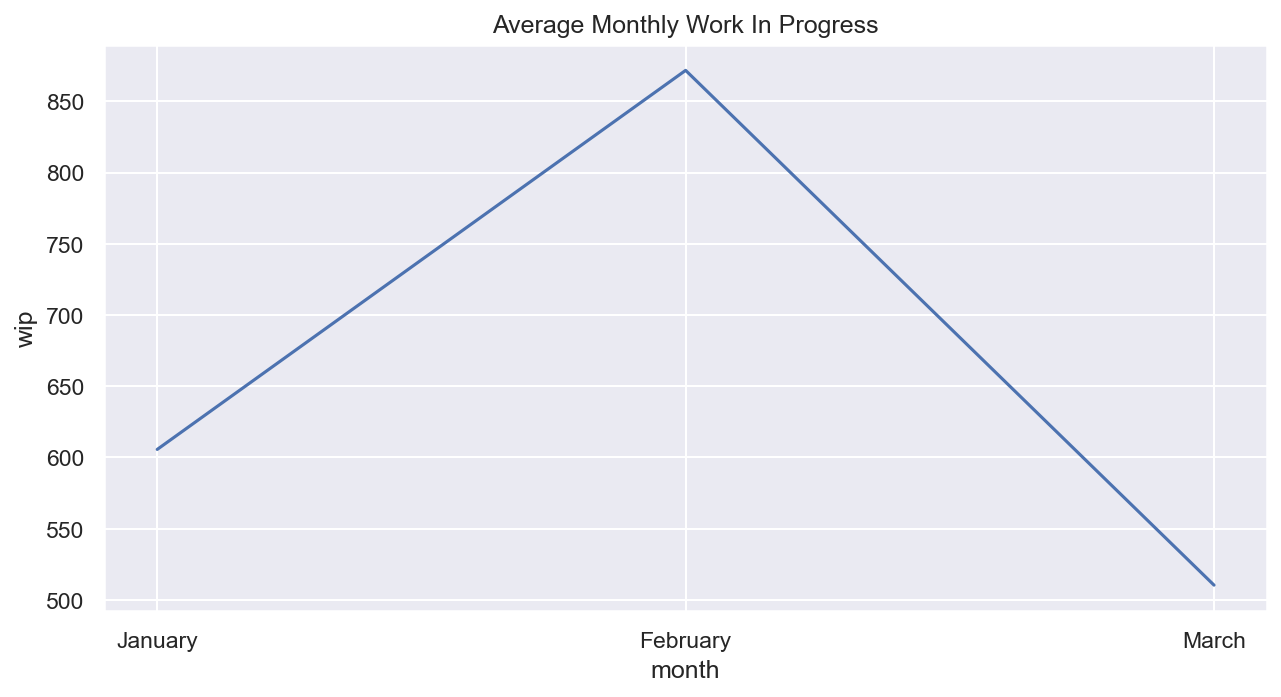

In [35]:
# plotting the average number of unfinished items per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=work_in_progress_per_month,x='month',y='wip',
                 palette='Paired',sort=False)
plt.title('Average Monthly Work In Progress')
plt.savefig('Average_Monthly_Work_In_Progress.png')
plt.show()


In [36]:
# average idle men per team
idle_men_per_team = df[['team','idle_men']].groupby('team',as_index=False).agg({'idle_men':'sum'})

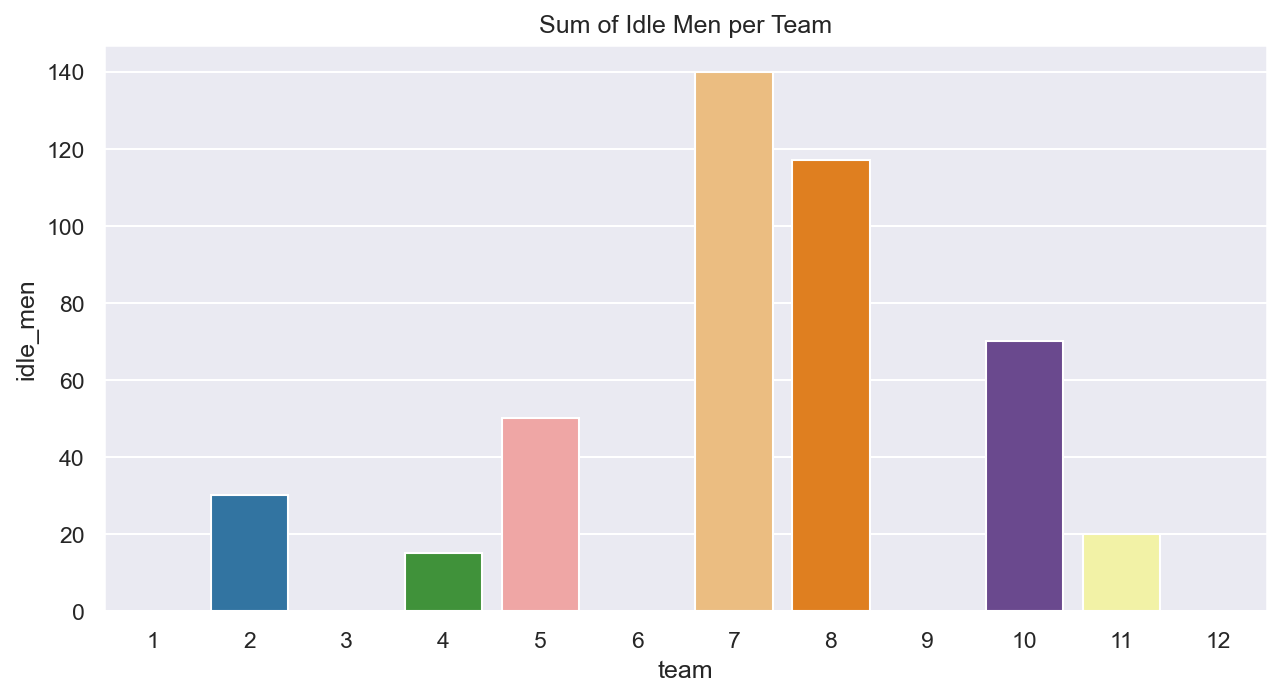

In [37]:
# plotting average idle men per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=idle_men_per_team,x='team',y='idle_men',
                 palette='Paired')
plt.title('Sum of Idle Men per Team')
plt.savefig('Sum_of_Idle_Men_per_Team.png')
plt.show()


In [38]:
# average overtime in hours per team
    
over_time_per_team = df[['team','overtime_in_hours']].groupby('team',
                                            as_index=False).agg({'overtime_in_hours':'mean'})

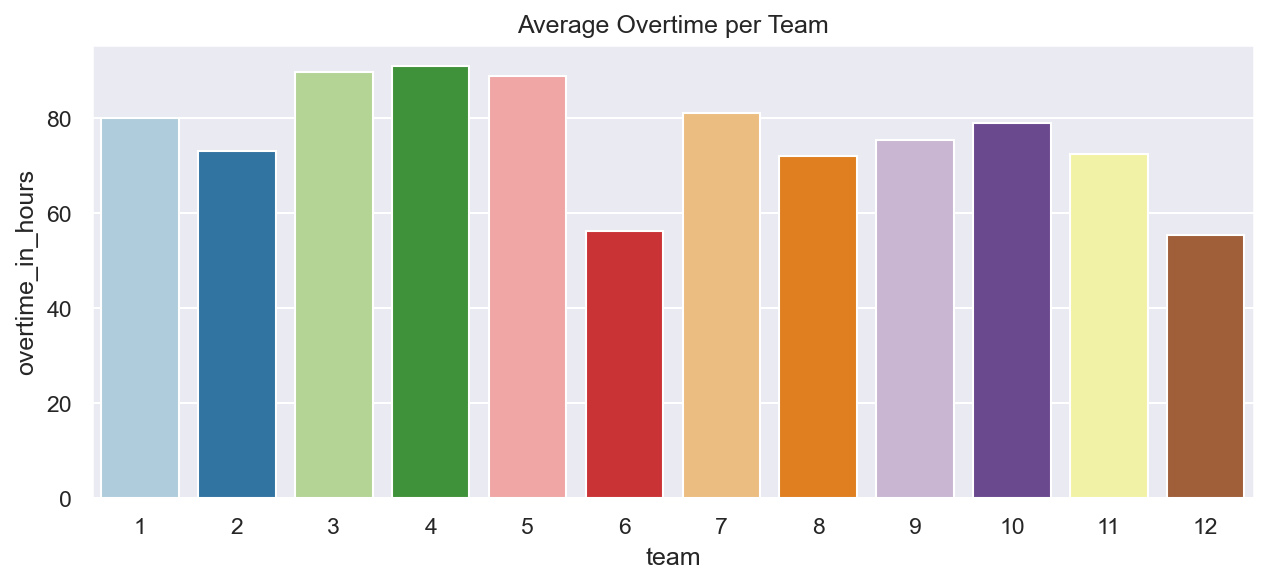

In [39]:
# plotting the average overtime per team 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=over_time_per_team,x='team',y='overtime_in_hours',
                 palette='Paired')
plt.title('Average Overtime per Team')
plt.savefig('Average_Overtime_per_Team.png')
plt.show()


In [40]:
# sum of incentives per team
incentives_per_team = df[['team','incentive']].groupby('team',
                                                as_index=False).agg({'incentive':'sum'})

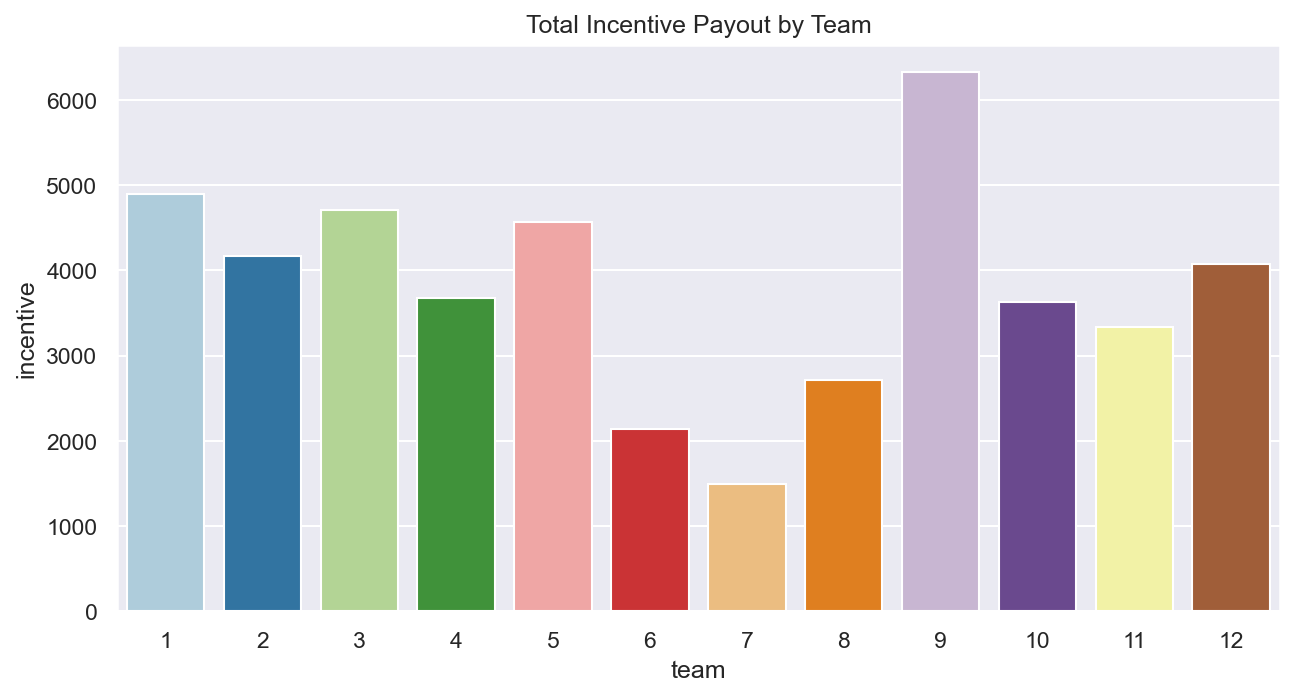

In [41]:
# plotting total incentives per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=incentives_per_team,x='team',y='incentive',
                 palette='Paired')
plt.title('Total Incentive Payout by Team')
plt.savefig('Total_Incentive_Payout_by_Team.png')
plt.show()


In [42]:
# average monthly overtime trend 
overtime_per_month = df[['month','overtime_in_hours']].groupby('month',
                                                sort=False).agg({'overtime_in_hours':'mean'})

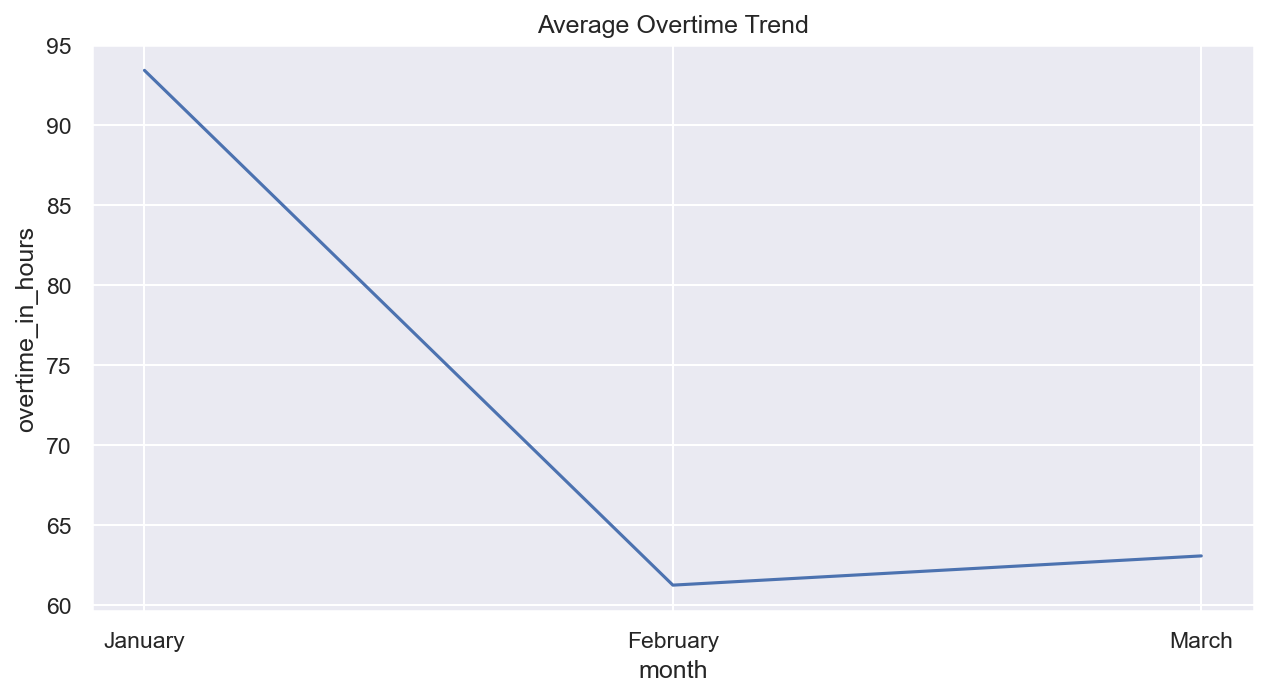

In [43]:
# plotting the average monthly overtime trend
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=overtime_per_month,x='month',y='overtime_in_hours',
                 palette='Paired',sort=False)
plt.title('Average Overtime Trend')
plt.savefig('Average_Overtime_Trend.png')
plt.show()


In [44]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,overtime_in_hours
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January,118.0
1,2015-01-01,Quarter1,sewing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,January,16.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,61.0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,61.0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,March,16.0
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,March,16.0
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,March,16.0
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,March,30.0


# Modling

## Data prep

In [45]:
# the actual productivity column is negatively skewed
df.skew().sort_values()

targeted_productivity    -2.144150
actual_productivity      -0.807492
no_of_workers            -0.111740
team                      0.009848
smv                       0.405937
over_time                 0.673287
overtime_in_hours         0.673287
no_of_style_change        2.942506
idle_men                  9.855079
wip                      10.852386
incentive                15.790746
idle_time                20.545425
dtype: float64

In [71]:
from scipy import stats
from scipy.special import inv_boxcox

In [47]:
# transforming the actual productivity column to be less negatively skewed
boxcox_actual = stats.boxcox(df['actual_productivity'])
box_cox_param = boxcox_actual[1]

boxcox_actual = pd.Series(boxcox_actual[0])

In [48]:
# reassigning actual productivity
df['actual_productivity'] = boxcox_actual

In [49]:
df['actual_productivity'].skew()

-0.1386649762614521

In [51]:
# converts team to a str in order to categorize it next
df['team'] = df['team'].apply(lambda x: str(x))

In [53]:
def categorical_data(unparsed_df):
    df_nums = df.select_dtypes(exclude='object')
    df_objs = df.select_dtypes(include='object')
    df_objs = pd.get_dummies(df_objs,drop_first=True)
    final_df = pd.concat([df_nums,df_objs],axis=1)
    return final_df

In [55]:
final_df = categorical_data(df)

In [57]:
# drop the date column
final_df.drop('date',axis=1,inplace=True)

In [58]:
final_df

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,month_January,month_March
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,-0.057434,...,0,0,0,0,0,0,1,0,1,0
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,-0.106759,...,0,0,0,0,0,0,0,0,1,0
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,-0.178650,...,0,0,0,0,0,0,0,0,1,0
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,-0.178650,...,0,0,0,0,0,0,0,0,1,0
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,-0.178799,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,0.0,960,0,0.0,0,0,8.0,-0.299730,...,0,0,0,0,0,0,0,0,0,1
1193,0.70,3.90,0.0,960,0,0.0,0,0,8.0,-0.301390,...,0,0,0,0,0,0,1,0,0,1
1194,0.65,3.90,0.0,960,0,0.0,0,0,8.0,-0.301390,...,0,0,0,0,0,1,0,0,0,1
1195,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,-0.367292,...,0,0,0,0,0,0,0,1,0,1


In [59]:
# splitting the data to input an output
X = final_df.drop('actual_productivity',axis=1)
y = final_df['actual_productivity']

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

In [61]:
# splitting the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=42)

In [62]:
# scaling the inputs of the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling Implementation

In [63]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.ensemble import ExtraTreesRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [64]:
# function that takes in model and training score and stores them in a df
# setting up inital dataframe
model_result_df=pd.DataFrame(columns=["model_name","TrainScore"])

def stores_model_results(modl_name,train_score):
    global model_result_df # changes the state of the global variable 
    row_loc=model_result_df.shape[0]+1
    model_result_df.loc[row_loc,["model_name","TrainScore"]]=[modl_name,train_score]

In [150]:
# Run each model and show the combined results.
def show_model_scores(x,y):
    global model_result_df
    model_result_df=model_result_df.iloc[0:0] # resets the display df
    for name,model in  [('LR',LinearRegression()),
                   ('Lasso',Lasso()),
                   ('Ridge',Ridge()),
                   ('EN',ElasticNet()),
                   ('XGB',XGBRegressor()),
                   ('ETR',ExtraTreesRegressor()),
                  ('Ada',AdaBoostRegressor())]:
        stores_model_results(name, cross_val_score(model,x,y,cv=3).mean())
        model_result_df.sort_values("TrainScore",ascending=False,inplace=True)
    print(model_result_df)
    #plots out the result
    sns.set_style("darkgrid")
    plt.figure(figsize=(10,8),dpi=150)
    axes = sns.barplot(data=model_result_df,x='model_name',y='TrainScore')
    plt.title('Training Scores')
    plt.show()

  model_name TrainScore
5        XGB   0.412972
6        ETR   0.405467
7        Ada   0.347286
3      Ridge   0.283745
1         LR   0.255028
2      Lasso  -0.012946
4         EN  -0.012946


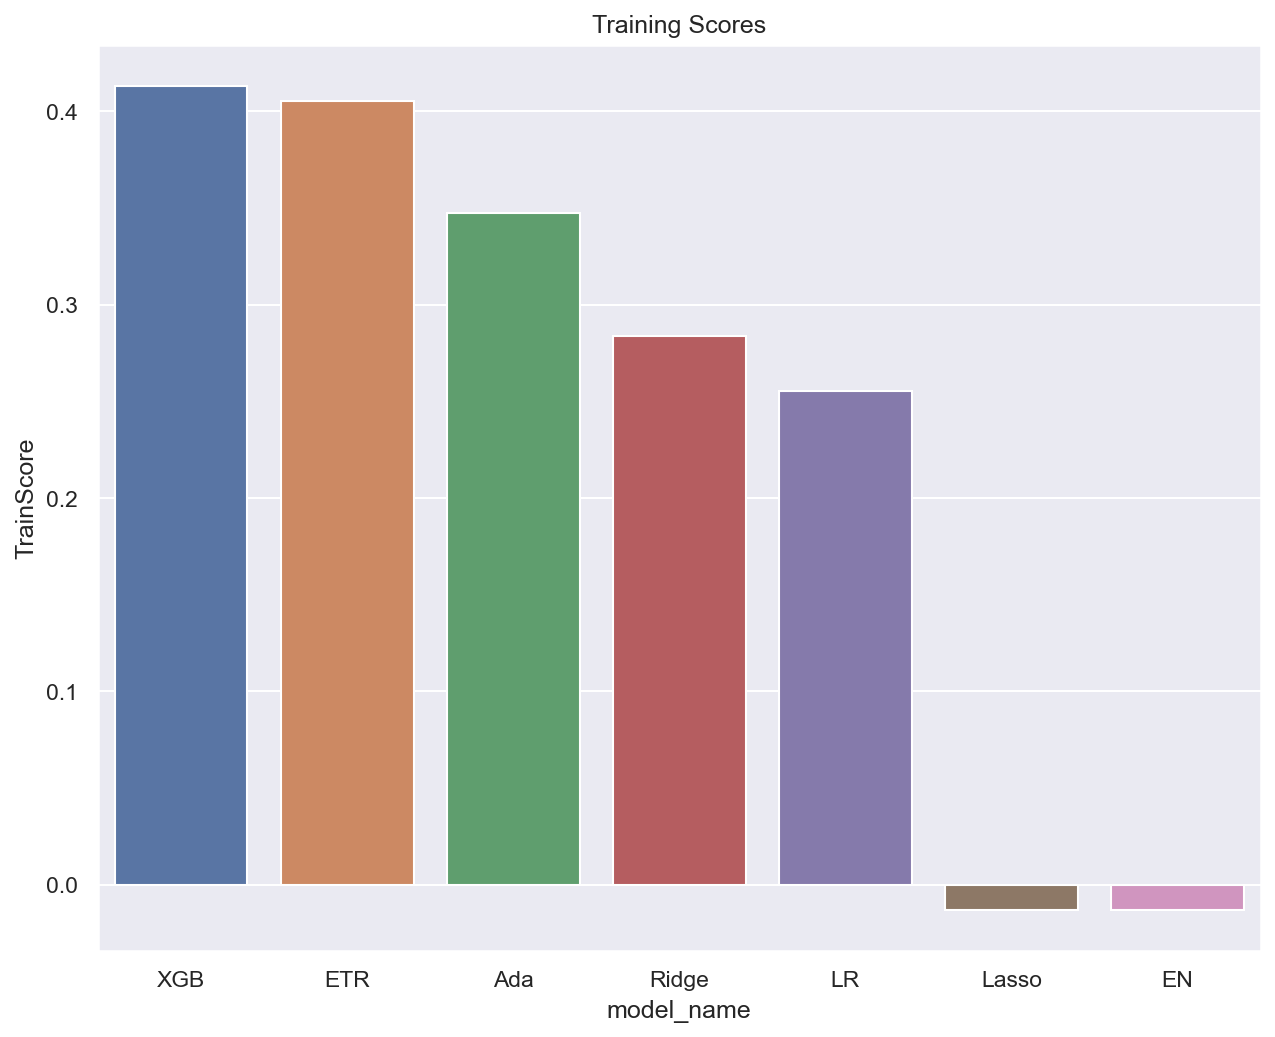

In [151]:
show_model_scores(X_train,y_train)

In [82]:
# Function for providing generalized results for regression model
def evaluate_model(model,x_train,y_train,x_test,y_test):
    '''
    Inputs
    1. regression model eg: LinearRegression(),LassoRegression() etc.
    2. training x data
    3. training y data
    4. testing x data
    5. testing y data
    '''
    model.fit(x_train,y_train)
    model_name= type(model).__name__
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print (f"Training score: {train_score}\nTesting score: {test_score}")
    
    y_pred=model.predict(x_test)
    print("Prediction completed.")
    df=pd.DataFrame({"Actual": y_test,
                     "Predicted":y_pred})
    
    #Apply inverse box cox to retrieve original target results
    df=inv_boxcox(df,box_cox_param)
    
    #Finding the difference between original and predicted
    df["difference"]=df['Predicted']-df['Actual']
    df.reset_index(inplace=True)
    
    #Plot actual vs predicted
    plt.figure(figsize=(10,5),dpi=150);
    sns.scatterplot(data=df,x="index",y="Actual",color='grey',label=["Actual"]);
    sns.lineplot(data=df,x="index",y="Predicted",color='salmon',label=["Predicted"]);
    plt.legend(loc="right",bbox_to_anchor=(1.1,1));
    plt.title(model_name+" -Actual vs Predicted");
    plt.show()
    
    print ("Sample comparison for actual and predicted target feature:")
    print(df.sample(10))
    print(model.get_params())
    
    # Return the model for re-use if required.
    return model

Training score: 0.979257990983347
Testing score: 0.40931711159708206
Prediction completed.


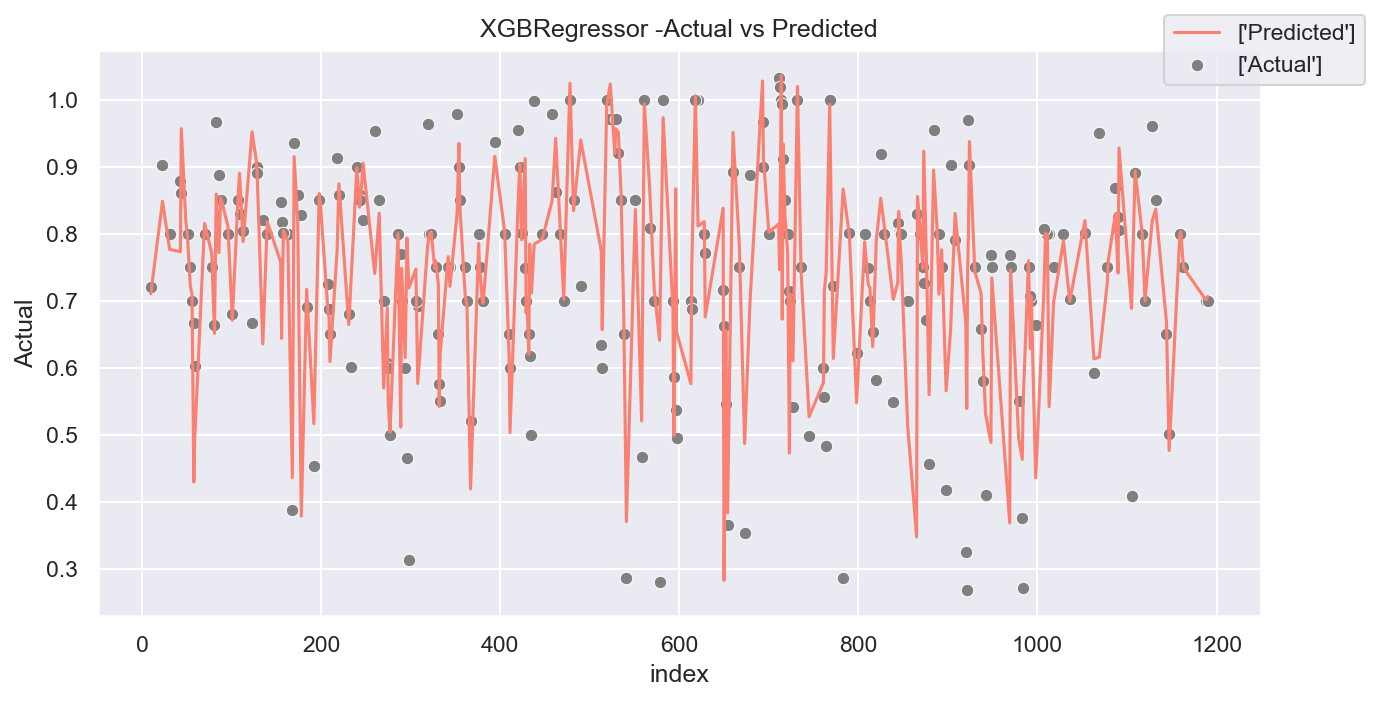

Sample comparison for actual and predicted target feature:
     index    Actual  Predicted  difference
189    937  0.658542   0.711637    0.053095
185    296  0.465758   0.793886    0.328129
83     113  0.804640   0.788423   -0.016217
86     538  0.650148   0.683105    0.032957
167    430  0.700437   0.700385   -0.000052
126    694  0.900632   0.912435    0.011803
12      49  0.800319   0.820308    0.019989
47      23  0.902917   0.848850   -0.054067
48      43  0.879714   0.773470   -0.106244
168    813  0.700614   0.718724    0.018110
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
evaluate_model(XGBRegressor(),X_train,y_train,X_test,y_test)

#### From our output errors, our model is overfitting the training set and underfitting the test set which means it is suffering from High Variance because it is not fitting well to new data

## Model Tunning

In [153]:
# Possible parameter values
param_tuning={
    'learning_rate' : [0.01,0.1,.11,.2],
    'max_depth' : [1,2,3,5],
    'min_child_weight' : [3,5,7,9],
    'subsample' : [0.5,0.7,0.9],
    'colsample_bytree' : [0.3,0.5,0.7,0.9],
    'n_estimators' : [25,50,100],
    'objective' : ['reg:squarederror']
}

In [154]:
gs = GridSearchCV (estimator = XGBRegressor(),
                       param_grid = param_tuning,
                       cv = 3,
                       n_jobs= -1,
                       verbose = 1)

In [155]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [156]:
print (gs.best_params_)

{'colsample_bytree': 0.9, 'learning_rate': 0.11, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.9}


In [164]:
selected_model = XGBRegressor(colsample_bytree = 0.9, learning_rate= 0.11, max_depth= 3, 
                              min_child_weight= 5,n_estimators= 100, subsample= 0.9)

Training score: 0.6837809291988219
Testing score: 0.5235747990948244
Prediction completed.


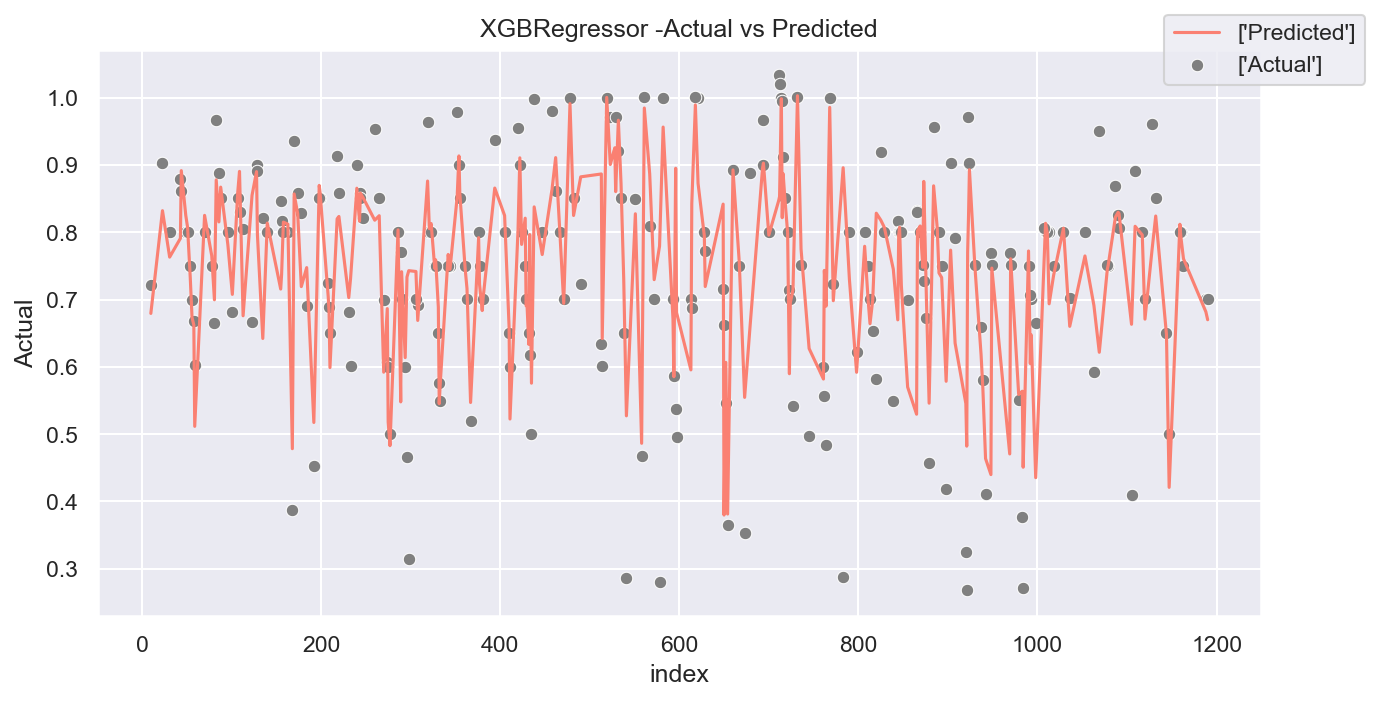

Sample comparison for actual and predicted target feature:
     index    Actual  Predicted  difference
189    937  0.658542   0.617980   -0.040561
98    1018  0.750255   0.736075   -0.014180
169     31  0.800125   0.763086   -0.037039
18     723  0.714410   0.589832   -0.124578
119    192  0.452980   0.517345    0.064365
227     83  0.966781   0.877903   -0.088879
233    420  0.955152   0.804108   -0.151044
77      56  0.699965   0.673277   -0.026689
55     331  0.650066   0.688909    0.038843
164    289  0.770114   0.547992   -0.222122
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.9, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.11, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.11, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
evaluate_model(selected_model,X_train,y_train,X_test,y_test)